# IT JUNIOR Hackathon - JOBMadrid'22

1.Carga de librerias

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import statsmodels.api as sm
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn import utils

1.1.Carga de Base de datos

In [2]:
train = pd.read_csv('C:\\Users\\angel\\Hackathon\\train.csv')
test = pd.read_csv('C:\\Users\\angel\\Hackathon\\test_X.csv', sep=';',encoding= 'unicode_escape')
sample = pd.read_csv('C:\\Users\\angel\\Hackathon\\ejemplo_predicciones.csv')

In [3]:
train.head(5)

,order_id,local_time,country_code,store_address,payment_status,n_of_products,products_total,final_status
0,33446280,14:11:09,AR,55379,PAID,2,11.88,DeliveredStatus
1,33107339,11:47:41,GT,23487,PAID,2,5.20,DeliveredStatus
2,32960645,11:53:53,CR,62229,PAID,1,6.03,DeliveredStatus
3,32089564,20:15:21,ES,29446,PAID,6,6.37,DeliveredStatus
4,32157739,21:32:16,AR,13917,PAID,1,5.36,CanceledStatus


In [4]:
test.head(5)

,order_id,local_time,country_code,store_address,payment_status,n_of_products,products_total
0,32233784,17:50:09,MA,68169,PAID,1,61.63
1,32240990,18:38:08,ES,8220,PAID,11,15.99
2,33331821,22:11:59,IT,11169,PAID,4,5.89
3,33200505,22:13:55,AR,33371,PAID,3,7.85
4,32527480,12:01:04,TR,33958,PAID,2,4.75


In [5]:
sample.head(5)

,final_status
0,1
1,1
2,1
3,1
4,1


1.2. Descripción de los datos

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54330 entries, 0 to 54329
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        54330 non-null  int64  
 1   local_time      54330 non-null  object 
 2   country_code    54330 non-null  object 
 3   store_address   54330 non-null  int64  
 4   payment_status  54330 non-null  object 
 5   n_of_products   54330 non-null  int64  
 6   products_total  54330 non-null  float64
 7   final_status    54330 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 3.3+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        30 non-null     int64  
 1   local_time      30 non-null     object 
 2   country_code    30 non-null     object 
 3   store_address   30 non-null     int64  
 4   payment_status  30 non-null     object 
 5   n_of_products   30 non-null     int64  
 6   products_total  30 non-null     float64
dtypes: float64(1), int64(3), object(3)
memory usage: 1.8+ KB


In [8]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   final_status  30 non-null     int64
dtypes: int64(1)
memory usage: 368.0 bytes


1.2.Revisar los valores perdidos

In [9]:
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())

#Aplicamos por columna:
print ("Valores nulos por columna para train")
print (train.apply(num_missing, axis=0))
print ("--------------------------------------------")
print ("Valores nulos por columna para test")
print (test.apply(num_missing, axis=0))

Valores nulos por columna para train
order_id          0
local_time        0
country_code      0
store_address     0
payment_status    0
n_of_products     0
products_total    0
final_status      0
dtype: int64
--------------------------------------------
Valores nulos por columna para test
order_id          0
local_time        0
country_code      0
store_address     0
payment_status    0
n_of_products     0
products_total    0
dtype: int64


2.1.Descripción estadística de los datos y Visualizar los datos

In [10]:
train.describe()

,order_id,store_address,n_of_products,products_total
count,5.433000e+04,54330.000000,54330.000000,54330.000000
mean,3.278267e+07,41609.384981,2.815792,9.838136
std,4.459402e+05,21903.267141,2.430936,9.260352
min,3.150378e+07,190.000000,1.000000,0.000000
25%,3.240007e+07,21369.000000,1.000000,4.130000
50%,3.278159e+07,45993.500000,2.000000,7.130000
75%,3.318380e+07,62004.000000,3.000000,12.770000
max,3.356085e+07,75236.000000,39.000000,221.480000


In [11]:
train['store_address'] = train['store_address'].astype('object')

In [12]:
train.dtypes

order_id            int64
local_time         object
country_code       object
store_address      object
payment_status     object
n_of_products       int64
products_total    float64
final_status       object
dtype: object

###### PREGUNTA 1:¿Cuáles son los 3 paises en los que más pedidos se realizan?

In [13]:
tabla =pd.pivot_table(data=train , index=['country_code'], values='n_of_products',fill_value=0,
               aggfunc="count")
tabla = tabla.sort_values(by=['n_of_products'], ascending=False)
tabla.head(5)

,n_of_products
country_code,
AR,11854
ES,11554
TR,5696
PE,4284
UA,3729


<Figure size 72000x72000 with 0 Axes>

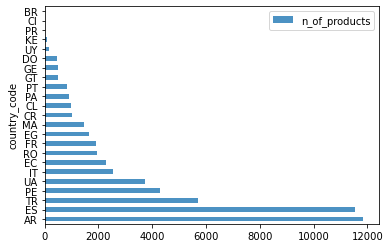

In [14]:

plt.figure(figsize=(1000,1000))
tabla.plot.barh( stacked=True,alpha=0.8)
plt.show()

###### RESPUESTA : AR , ES , TR

###### PREGUNTA 2 :¿Cuáles son las horas en las que se realizan más pedidos en España?

In [15]:
train.head(5)

,order_id,local_time,country_code,store_address,payment_status,n_of_products,products_total,final_status
0,33446280,14:11:09,AR,55379,PAID,2,11.88,DeliveredStatus
1,33107339,11:47:41,GT,23487,PAID,2,5.20,DeliveredStatus
2,32960645,11:53:53,CR,62229,PAID,1,6.03,DeliveredStatus
3,32089564,20:15:21,ES,29446,PAID,6,6.37,DeliveredStatus
4,32157739,21:32:16,AR,13917,PAID,1,5.36,CanceledStatus


In [16]:
train['Hora']=train['local_time'].str[:2]
train.head(5)

,order_id,local_time,country_code,store_address,payment_status,n_of_products,products_total,final_status,Hora
0,33446280,14:11:09,AR,55379,PAID,2,11.88,DeliveredStatus,14
1,33107339,11:47:41,GT,23487,PAID,2,5.20,DeliveredStatus,11
2,32960645,11:53:53,CR,62229,PAID,1,6.03,DeliveredStatus,11
3,32089564,20:15:21,ES,29446,PAID,6,6.37,DeliveredStatus,20
4,32157739,21:32:16,AR,13917,PAID,1,5.36,CanceledStatus,21


In [17]:
train_ES=train[train['country_code']=="ES"]
train_ES.head(5)

,order_id,local_time,country_code,store_address,payment_status,n_of_products,products_total,final_status,Hora
3,32089564,20:15:21,ES,29446,PAID,6,6.37,DeliveredStatus,20
8,32236610,17:09:16,ES,30120,PAID,3,4.35,DeliveredStatus,17
13,32235607,18:02:18,ES,18682,PAID,9,16.12,DeliveredStatus,18
19,32670668,14:37:58,ES,8994,PAID,12,17.93,DeliveredStatus,14
24,32126718,21:12:30,ES,14872,PAID,3,22.00,DeliveredStatus,21


In [18]:
tabla_ES =pd.pivot_table(data=train , index=['Hora'], values='n_of_products',fill_value=0,
               aggfunc="count")
tabla_ES = tabla_ES.sort_values(by=['n_of_products'], ascending=False)
tabla_ES.head(5)

,n_of_products
Hora,
20,6692
21,5494
19,4918
13,4445
14,3942


<Figure size 72000x72000 with 0 Axes>

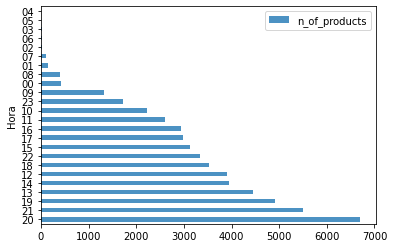

In [19]:
plt.figure(figsize=(1000,1000))
tabla_ES.plot.barh( stacked=True,alpha=0.8)
plt.show()

###### RESPUESTA : LAS MAYORES A LAS 20 , 21 , 19 ,13 ,14 HORAS

###### PREGUNTA 3 :¿Cuál es el precio medio por pedido en la tienda con ID 12513?

In [20]:
train_ID12513=train[train['store_address']==12513]

tabla_ID12513 =pd.pivot_table(data=train_ID12513 , index=['store_address'], values='n_of_products',fill_value=0,
               aggfunc="mean")

tabla_ID12513

,n_of_products
store_address,
12513,2.873469


###### RESPUESTA: 2.873469

###### PREGUNTA 4 :Teniendo en cuenta los picos de demanda en España, si los repartidores trabajan en turnos de 8horas.
Turno 1 (00:00-08:00)
Turno 2 (08:00-16:00)
Turno 3 (16:00-00:00)
Qué porcentaje de repartidores pondrías por cada turno para que sean capaces de hacer frente a los picos de demanda. (ej: Turno 1 el 30%, Turno 2 el 10% y Turno 3 el 60%).


In [21]:
train["Turno"] = pd.to_numeric(train["Hora"])
train.head(5)

,order_id,local_time,country_code,store_address,payment_status,n_of_products,products_total,final_status,Hora,Turno
0,33446280,14:11:09,AR,55379,PAID,2,11.88,DeliveredStatus,14,14
1,33107339,11:47:41,GT,23487,PAID,2,5.20,DeliveredStatus,11,11
2,32960645,11:53:53,CR,62229,PAID,1,6.03,DeliveredStatus,11,11
3,32089564,20:15:21,ES,29446,PAID,6,6.37,DeliveredStatus,20,20
4,32157739,21:32:16,AR,13917,PAID,1,5.36,CanceledStatus,21,21


In [22]:
def convertir_Turno(train):
    train.Turno = train.Turno.fillna(-0.5)
    bins = (-1, 8, 16,120)
    group_names = ['Turno 1', 'Turno 2', 'Turno 3']
    categories = pd.cut(train.Turno, bins, labels=group_names)
    train.Turno = categories
    return train

In [23]:
train.head()

,order_id,local_time,country_code,store_address,payment_status,n_of_products,products_total,final_status,Hora,Turno
0,33446280,14:11:09,AR,55379,PAID,2,11.88,DeliveredStatus,14,14
1,33107339,11:47:41,GT,23487,PAID,2,5.20,DeliveredStatus,11,11
2,32960645,11:53:53,CR,62229,PAID,1,6.03,DeliveredStatus,11,11
3,32089564,20:15:21,ES,29446,PAID,6,6.37,DeliveredStatus,20,20
4,32157739,21:32:16,AR,13917,PAID,1,5.36,CanceledStatus,21,21


In [24]:
train = convertir_Turno(train)
train.head(5)

,order_id,local_time,country_code,store_address,payment_status,n_of_products,products_total,final_status,Hora,Turno
0,33446280,14:11:09,AR,55379,PAID,2,11.88,DeliveredStatus,14,Turno 2
1,33107339,11:47:41,GT,23487,PAID,2,5.20,DeliveredStatus,11,Turno 2
2,32960645,11:53:53,CR,62229,PAID,1,6.03,DeliveredStatus,11,Turno 2
3,32089564,20:15:21,ES,29446,PAID,6,6.37,DeliveredStatus,20,Turno 3
4,32157739,21:32:16,AR,13917,PAID,1,5.36,CanceledStatus,21,Turno 3


In [25]:
train_ES=train[train['country_code']=="ES"]
train_ES.head(5)

,order_id,local_time,country_code,store_address,payment_status,n_of_products,products_total,final_status,Hora,Turno
3,32089564,20:15:21,ES,29446,PAID,6,6.37,DeliveredStatus,20,Turno 3
8,32236610,17:09:16,ES,30120,PAID,3,4.35,DeliveredStatus,17,Turno 3
13,32235607,18:02:18,ES,18682,PAID,9,16.12,DeliveredStatus,18,Turno 3
19,32670668,14:37:58,ES,8994,PAID,12,17.93,DeliveredStatus,14,Turno 2
24,32126718,21:12:30,ES,14872,PAID,3,22.00,DeliveredStatus,21,Turno 3


In [26]:
tabla_turno =pd.pivot_table(data=train_ES , index=['Turno'], values=['n_of_products'],fill_value=0,
               aggfunc=[np.sum,len,lambda x:(x.count()/train_ES['n_of_products'].count()*100)])
tabla_turno

,sum,len,<lambda>
,n_of_products,n_of_products,n_of_products
Turno,,,
Turno 1,82,36,0.311580
Turno 2,24292,5083,43.993422
Turno 3,26434,6435,55.694997


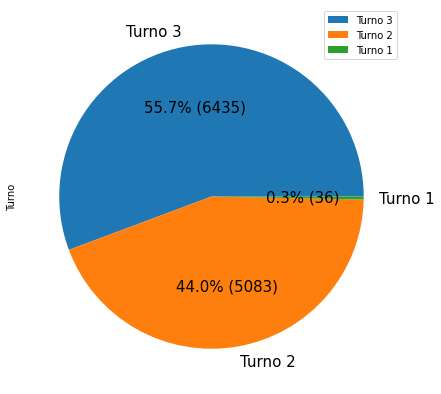

In [27]:
def autopct_fun(abs_values):
    gen = iter(abs_values)
    return lambda pct: f"{pct:.1f}% ({next(gen)})"

counts = train_ES['Turno'].value_counts()

counts.plot(kind='pie',
            fontsize=15,
            figsize=(7, 7),
            autopct=autopct_fun(counts),
            legend = True
            )

plt.show()

###### RESPUESTA : TURNO 1 :0.3 % , TURNO 2 :44% , TURNO 3:55.7%

###### PREGUNTA 5 :Realiza un modelo predictivo de machine learning a partir del dataset 'train.csv' en el cual a partir de las variables predictoras que se entregan en el dataset 'test_X' se pueda predecir si el pedido se cancelará o no (columna 'final_status')

3.1.Preparacion de la data :

In [28]:
train.head(5)

,order_id,local_time,country_code,store_address,payment_status,n_of_products,products_total,final_status,Hora,Turno
0,33446280,14:11:09,AR,55379,PAID,2,11.88,DeliveredStatus,14,Turno 2
1,33107339,11:47:41,GT,23487,PAID,2,5.20,DeliveredStatus,11,Turno 2
2,32960645,11:53:53,CR,62229,PAID,1,6.03,DeliveredStatus,11,Turno 2
3,32089564,20:15:21,ES,29446,PAID,6,6.37,DeliveredStatus,20,Turno 3
4,32157739,21:32:16,AR,13917,PAID,1,5.36,CanceledStatus,21,Turno 3


In [29]:
train.dtypes

order_id             int64
local_time          object
country_code        object
store_address       object
payment_status      object
n_of_products        int64
products_total     float64
final_status        object
Hora                object
Turno             category
dtype: object

In [30]:
from sklearn.preprocessing import LabelEncoder

train['final_status'] = train['final_status'].replace({'DeliveredStatus': 1,'CanceledStatus': 0})


In [31]:
train.head()

,order_id,local_time,country_code,store_address,payment_status,n_of_products,products_total,final_status,Hora,Turno
0,33446280,14:11:09,AR,55379,PAID,2,11.88,1,14,Turno 2
1,33107339,11:47:41,GT,23487,PAID,2,5.20,1,11,Turno 2
2,32960645,11:53:53,CR,62229,PAID,1,6.03,1,11,Turno 2
3,32089564,20:15:21,ES,29446,PAID,6,6.37,1,20,Turno 3
4,32157739,21:32:16,AR,13917,PAID,1,5.36,0,21,Turno 3


In [33]:
le=LabelEncoder()

train['country_code'] = le.fit_transform(train['country_code'])
train['store_address'] = le.fit_transform(train['store_address'])
train['payment_status'] = le.fit_transform(train['payment_status'])
train['Hora'] = le.fit_transform(train['Hora'])
train.head(5)

,order_id,local_time,country_code,store_address,payment_status,n_of_products,products_total,final_status,Hora,Turno
0,33446280,14:11:09,0,3092,2,2,11.88,1,14,Turno 2
1,33107339,11:47:41,11,1242,2,2,5.20,1,11,Turno 2
2,32960645,11:53:53,4,3803,2,1,6.03,1,11,Turno 2
3,32089564,20:15:21,8,1423,2,6,6.37,1,20,Turno 3
4,32157739,21:32:16,0,745,2,1,5.36,0,21,Turno 3


3.2.Analisis variables 

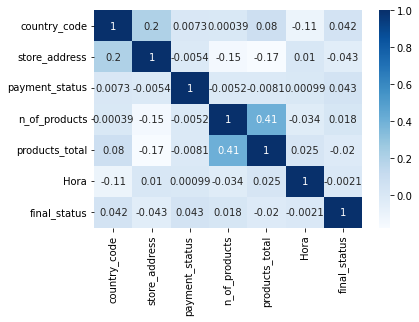

In [34]:
sns.heatmap(train[['country_code', 'store_address', 'payment_status', 'n_of_products', 'products_total','Hora','final_status']].corr(), annot=True, cmap = 'Blues')
plt.show()

In [35]:
train['final_status'].value_counts()

1    48498
0     5832
Name: final_status, dtype: int64

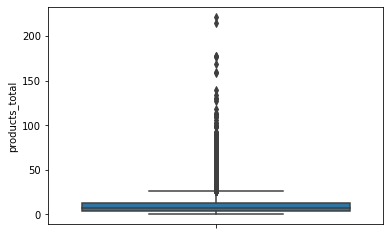

In [36]:
sns.boxplot( y=train.products_total)
plt.show()

In [37]:
train = train.drop('order_id', axis=1)
train = train.drop('local_time', axis=1)
train = train.drop('Turno', axis=1)
train_parametrica=train

3.3.Selección de Drivers Mediante Técnicas de Machine Learning

In [38]:
train_parametrica=train

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_parametrica.drop('final_status', axis=1),# Covariables
                                                    train_parametrica['final_status'],             # Target
                                                    test_size=0.30,                               # Tamano del test
                                                    stratify=train_parametrica['final_status'],    # Estratificacion
                                                   random_state=100)

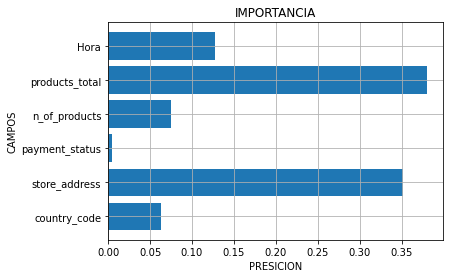

In [40]:
from sklearn.ensemble import RandomForestClassifier as RFC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

rf = RFC()                   # Instancio el algoritmo
rf.fit(X_train, y_train)     # Ajusto o entreno el algoritmo
importances = rf.feature_importances_


# horizontal bar plot of feature importance
pos = np.arange(6) + 0.5
plt.barh(pos, importances, align='center')
plt.title("IMPORTANCIA")
plt.xlabel("PRESICION")
plt.ylabel("CAMPOS")
plt.yticks(pos, X_train.columns)
plt.grid(True)

3..4. Creacion del data train

In [48]:
features=['store_address','products_total','Hora']
X_train2 =X_train[features]
X_test2 = X_test[features]


In [49]:
X_train2.head(5)

,store_address,products_total,Hora
7698,5398,1.84,17
19419,3209,1.12,14
19889,2464,2.70,15
18258,2406,25.17,12
50897,140,15.27,10


3.5.ELECCIÓN DEL MEJOR MODELO

In [50]:
import numpy as np
from sklearn.model_selection import cross_val_score
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold

###discriminativo###
from sklearn.svm import SVC
###generativo####
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [51]:
kfolds = StratifiedKFold(shuffle=True, random_state=1) 

In [52]:
import numpy as np
def run_model(model, X, y):
    model_name = str(model.__class__).split('.')[-1].replace('>','').replace("'",'')
    print(model_name)
    accuracy = []
    f1 = []
    start = int(time.time() * 1000)
    model.fit(X_train2, y_train)
    y_ = model.predict(X_test2)
    accuracy += [accuracy_score(y_test, y_)]
    f1 += [f1_score(y_test, y_,average='weighted')]
    end = int(time.time() * 1000)
    results.loc[len(results)] = [model_name, np.mean(accuracy), np.mean(f1),str(end - start)]

In [53]:
    
def run_ensemble_models(X, y):
    run_model(RandomForestClassifier(), X_train2, y_train)
    run_model(GaussianNB() , X_train2, y_train)
    run_model(MultinomialNB(), X_train2, y_train)
    ###run_model(SVC(), X_train2, y_train)    
    run_model(KNeighborsClassifier(), X_train2, y_train)
    run_model(DecisionTreeClassifier(), X_train2, y_train)


In [54]:
results = pd.DataFrame(columns=['model', 'accuracy','f1','time'])

In [55]:
run_ensemble_models(X_train2, y_train)

RandomForestClassifier
GaussianNB
MultinomialNB
KNeighborsClassifier
DecisionTreeClassifier


In [56]:
results

,model,accuracy,f1,time
0,RandomForestClassifier,0.881956,0.847598,3534
1,GaussianNB,0.882876,0.841578,16
2,MultinomialNB,0.885699,0.842702,15
3,KNeighborsClassifier,0.885085,0.847857,440
4,DecisionTreeClassifier,0.817780,0.822075,125


###### RESPUESTA : MEJOR MODELO KNeighborsClassifier f1:0.847857

In [57]:
Nk = KNeighborsClassifier()
Nk.fit(X_train2, y_train)
  

KNeighborsClassifier()

In [58]:
test['Hora']=test['local_time'].str[:2]
test['Hora'] = le.fit_transform(test['Hora'])
test['store_address'] = le.fit_transform(test['store_address'])
test =test[features]
test.head(5)

,store_address,products_total,Hora
0,27,61.63,8
1,1,15.99,9
2,3,5.89,12
3,13,7.85,12
4,14,4.75,3


###### Entrega las predicciones 

In [59]:
predictions = Nk.predict(test)

In [60]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [61]:
submission = pd.DataFrame({
                "final_status": predictions.flatten()
    })
submission.to_csv('Akadelivers.csv', index=False)
submission

,final_status
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1
